<a href="https://colab.research.google.com/github/natpol567/Zadania/blob/main/Untitled36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

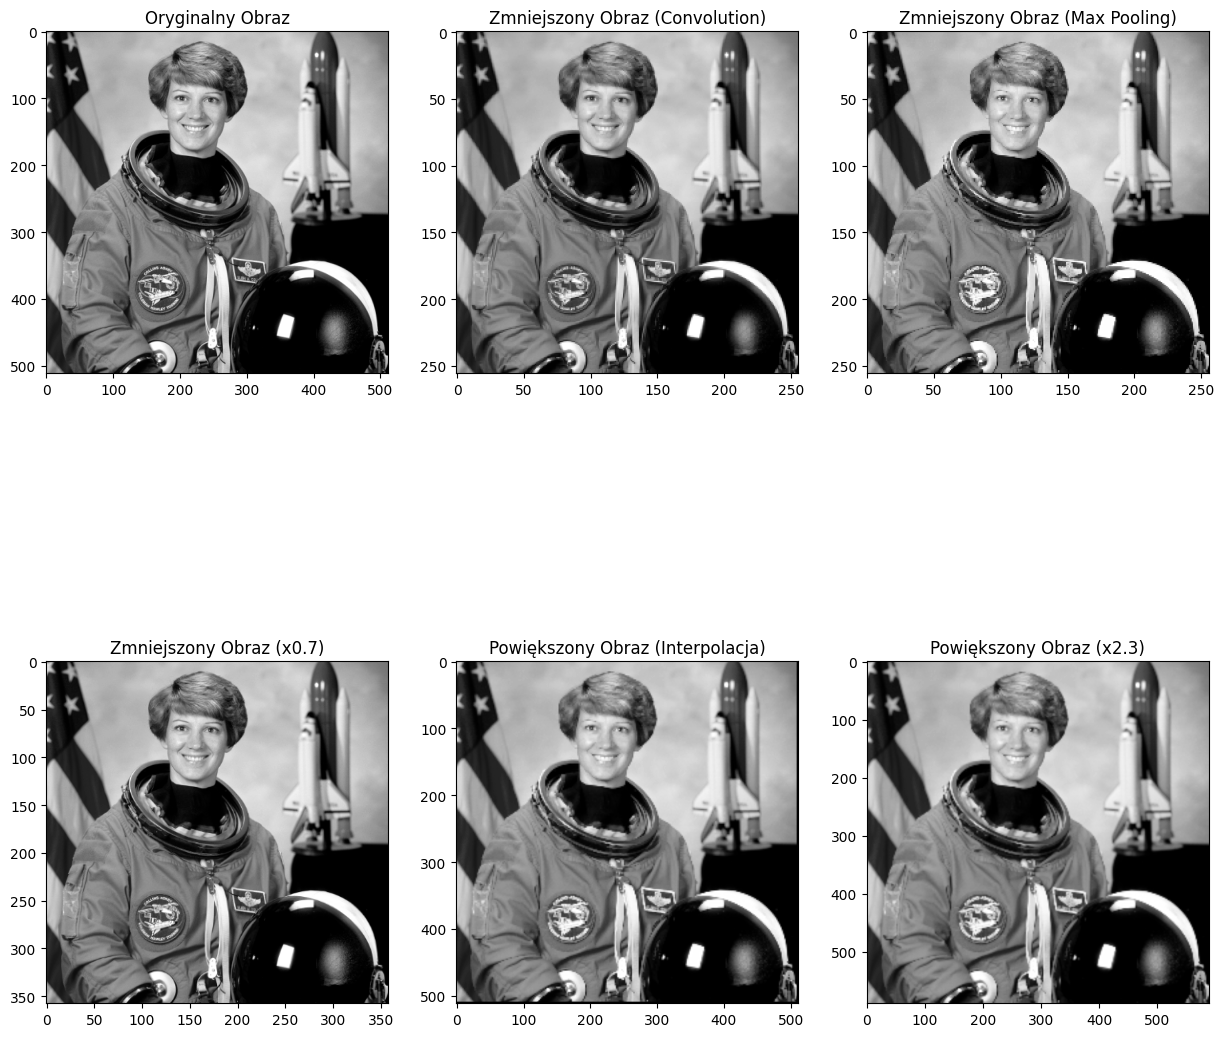

MSE  Oryginalny Obraz: 0.0
MSE  Zmniejszony Obraz (Convolution): 0.5181878539235468
MSE  Zmniejszony Obraz (Max Pooling): 0.1333380417918238
MSE  Zmniejszony Obraz (x0.7): 0.0006473815477186781
MSE  Powiększony Obraz (Interpolacja): 0.0049725644836607
MSE  Powiększony Obraz (x2.3): 0.0031031974765622613


In [ ]:
import numpy as np
from skimage import io, color, data
from scipy.signal import convolve2d
from skimage.measure import block_reduce
from skimage.transform import rescale
from matplotlib import pyplot as plt

# Funkcja do zmniejszania obrazu za pomocą splotu z jądrem uśredniającym
def downsize_with_conv(im, k):
    result = convolve2d(im, k, mode='valid')
    return result[::2, ::2]

# Funkcja do zmniejszania obrazu za pomocą Max Pooling
def downsize_with_max_pooling(im, factor):
    return block_reduce(im, (factor, factor), np.max)

# Funkcja interpolacji
def interpolate_function(im, factor):
    rows, cols = im.shape
    new_rows = int(rows * factor)
    new_cols = int(cols * factor)

    result = np.zeros((new_rows, new_cols), dtype=np.float64)

    for i in range(new_rows):
        for j in range(new_cols):
            x = i / factor
            y = j / factor

            x_floor, y_floor = int(np.floor(x)), int(np.floor(y))
            x_ceil, y_ceil = min(x_floor + 1, rows - 1), min(y_floor + 1, cols - 1)

            result[i, j] = im[x_floor, y_floor] * (x_ceil - x) * (y_ceil - y) + \
                            im[x_floor, y_ceil] * (x_ceil - x) * (y - y_floor) + \
                            im[x_ceil, y_floor] * (x - x_floor) * (y_ceil - y) + \
                            im[x_ceil, y_ceil] * (x - x_floor) * (y - y_floor)

    return result

# Funkcja do zmniejszania obrazu o niecałkowitą wielokrotność
def downsize_by_factor(im, factor):
    return rescale(im, factor, anti_aliasing=True)

# Funkcja do zwiększania obrazu o niecałkowitą wielokrotność
def upscale_by_factor(im, factor):
    return rescale(im, factor, anti_aliasing=True)

# Wczytanie obrazu testowego ( obraz astronaut.png)
image = data.astronaut()
image_gray = color.rgb2gray(image)

kernel = np.ones((2, 2)) / 2

mse_values = []

mse_values.append(np.mean((image_gray - image_gray)**2))

# Zmniejszenie obrazu za pomocą splotu
downsized_conv = downsize_with_conv(image_gray, kernel)
mse_values.append(np.mean((image_gray[:downsized_conv.shape[0], :downsized_conv.shape[1]] - downsized_conv)**2))

# Zmniejszenie obrazu za pomocą Max Pooling
downsized_max_pooling = downsize_with_max_pooling(image_gray, factor=2)
mse_values.append(np.mean((image_gray[:downsized_max_pooling.shape[0], :downsized_max_pooling.shape[1]] - downsized_max_pooling)**2))

# Zmniejszenie obrazu o niecałkowitą wielokrotność
downsized_factor = 0.7
downsized_custom = downsize_by_factor(image_gray, downsized_factor)
new_rows, new_cols = 512, 512


rescaled_downsized_custom = rescale(downsized_custom, (new_rows / downsized_custom.shape[0], new_cols / downsized_custom.shape[1]), anti_aliasing=True)
mse_values.append(np.mean((image_gray[:new_rows, :new_cols] - rescaled_downsized_custom)**2))

# Powiększenie obrazu za pomocą interpolacji
enlarged = interpolate_function(downsized_max_pooling, factor=2)
mse_values.append(np.mean((image_gray[:enlarged.shape[0], :enlarged.shape[1]] - enlarged)**2))

# Powiększenie obrazu o niecałkowitą wielokrotność
upscaled_factor = 2.3
upscaled_custom = upscale_by_factor(downsized_max_pooling, upscaled_factor)
new_rows, new_cols = 512, 512


rescaled_upscaled_custom = rescale(upscaled_custom, (new_rows / upscaled_custom.shape[0], new_cols / upscaled_custom.shape[1]), anti_aliasing=True)
mse_values.append(np.mean((image_gray[:new_rows, :new_cols] - rescaled_upscaled_custom)**2))

# Wyświetlanie obrazków
titles = ["Oryginalny Obraz", "Zmniejszony Obraz (Convolution)", "Zmniejszony Obraz (Max Pooling)",
          f"Zmniejszony Obraz (x{downsized_factor})", "Powiększony Obraz (Interpolacja)",
          f"Powiększony Obraz (x{upscaled_factor})"]
images = [image_gray, downsized_conv, downsized_max_pooling, downsized_custom, enlarged, upscaled_custom]

plt.figure(figsize=(15, 15))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])




plt.show()

# Wyświetlanie wartości MSE dla każdego etapu
for i in range(6):
    print(f"MSE  {titles[i]}: {mse_values[i]}")